## Import packages

ref data from :https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import array
from mpl_toolkits.mplot3d import Axes3D
fire = pd.read_table('forestfires.txt')
all = fire[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']].values

## check if the data is classfiable

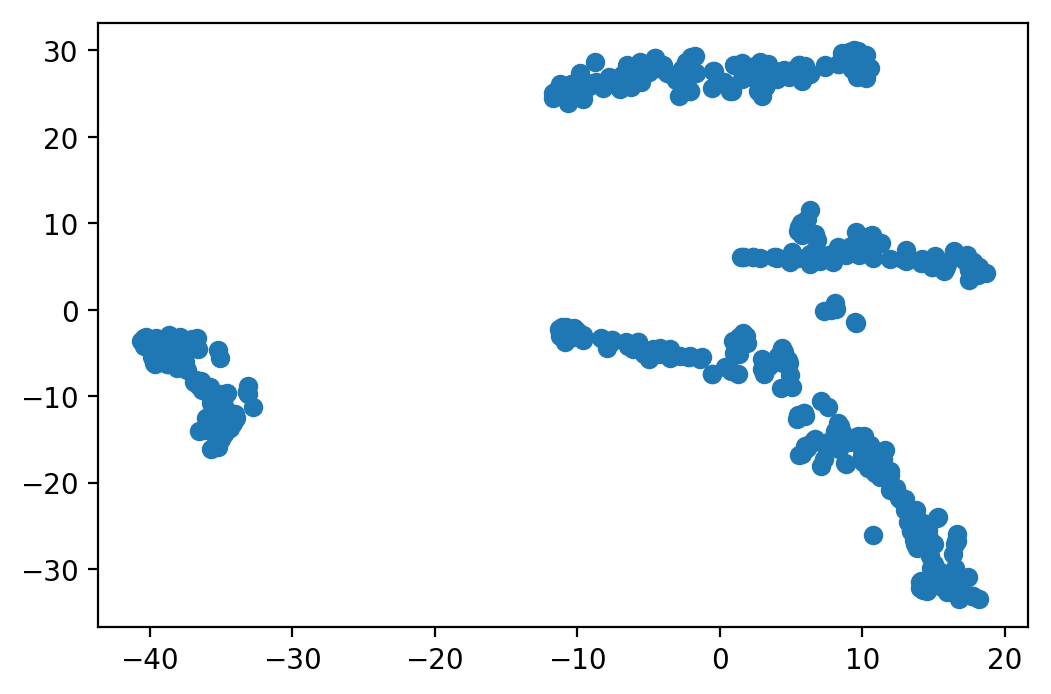

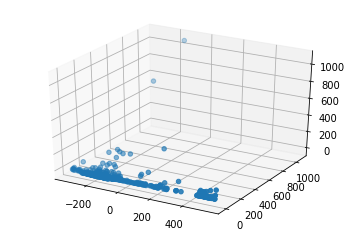

[0.90590268 0.05925665 0.03053587]


In [2]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
d=tsne.fit_transform(all)  
plt.figure(dpi=200)
plt.scatter(d[:,0],d[:,1])
plt.show()
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
d=pca.fit_transform(all)  
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(d[:,0],d[:,1],d[:,1])
plt.show()
# ref:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
print(pca.explained_variance_ratio_)

### result shows the first component have 90% of dominance in the whole parameters

In [3]:
 print(pca.components_)

[[-5.98445174e-03 -1.79695156e-01 -9.83531783e-01 -4.00965494e-03
  -1.15658464e-02  1.81879643e-03  1.53576549e-03 -4.49636170e-05
  -1.35482231e-02]
 [ 1.51260177e-03  7.04859739e-02 -2.67376550e-02  1.60355275e-04
   7.29435855e-03 -1.71164270e-02  7.44486523e-04 -2.94848974e-05
   9.96979326e-01]
 [ 1.53257965e-02  9.78722052e-01 -1.78061335e-01  1.76975177e-02
   1.77463814e-02  6.47884787e-02  2.28331661e-03  4.57264828e-04
  -7.30158841e-02]]


## in 13 variables, parameter #3 in component 1 has the  most dominante role which means it is a important factor, also we can find the most dominante factor in component 2 is #13. #6 in the 3rd

## now we exclude some parameters to reduce our work load

In [4]:
X_in = fire[['wind','FFMC','DMC','RH']].values # we kept these variables
xname='wind','FFMC','DMC','RH'
# X = fire[['month','FFMC','DMC','RH','rain']].values # we kept these variables
# X_name='month','FFMC','DMC','RH','rain'
# p_x=fire[['X']].values
# p_y=fire[['Y']].values

In [7]:
T=fire[['ISI']].values
yname = 'ISI'
# print(len(X))

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X_in)
X =X_in
# print(T)
Targ=np.zeros(len(X))
# Tmp=TMP.reshape(len(X),1)
for i in range(0,len(X)):
    if T[i]<7 and T[i]>0:
        Targ[i]=1 
    elif T[i]>=7 and T[i]<14:
        Targ[i]=2
    elif T[i]>=14:
        Targ[i]=3

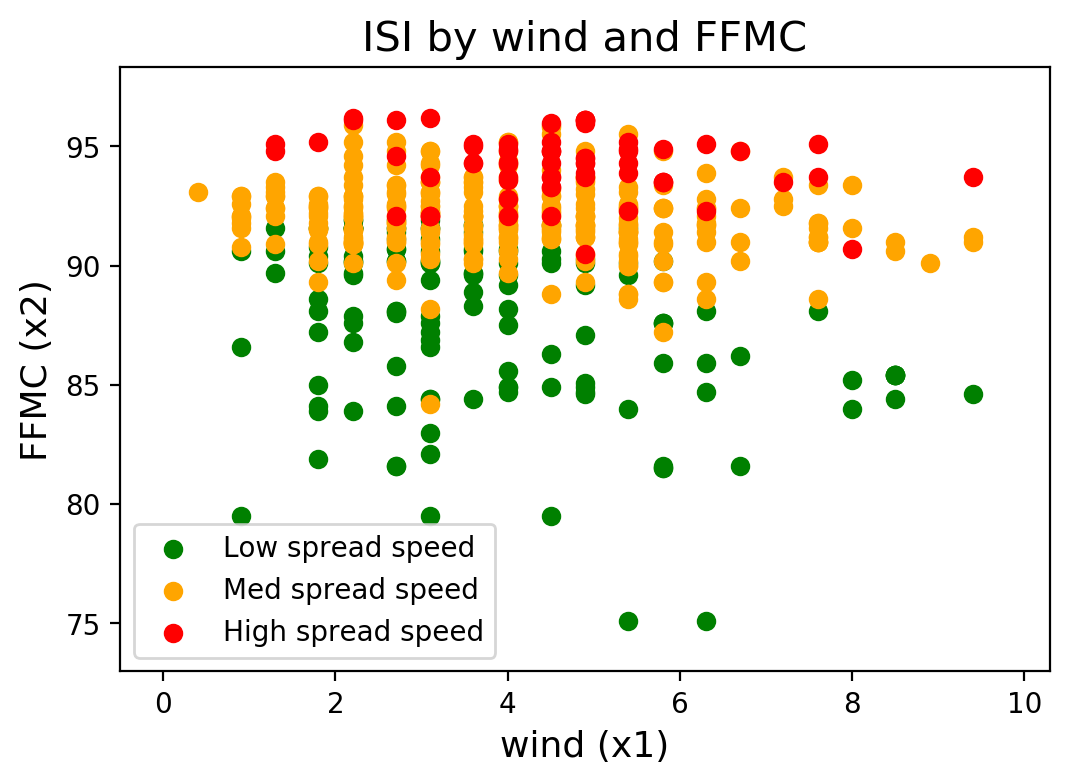

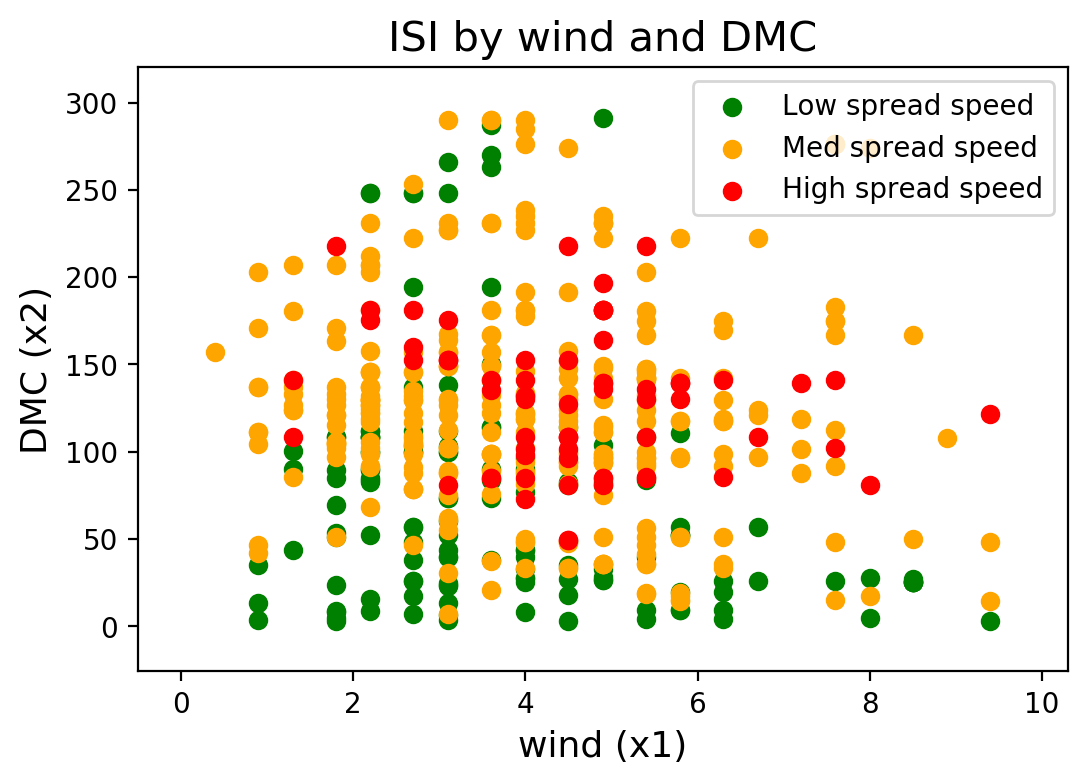

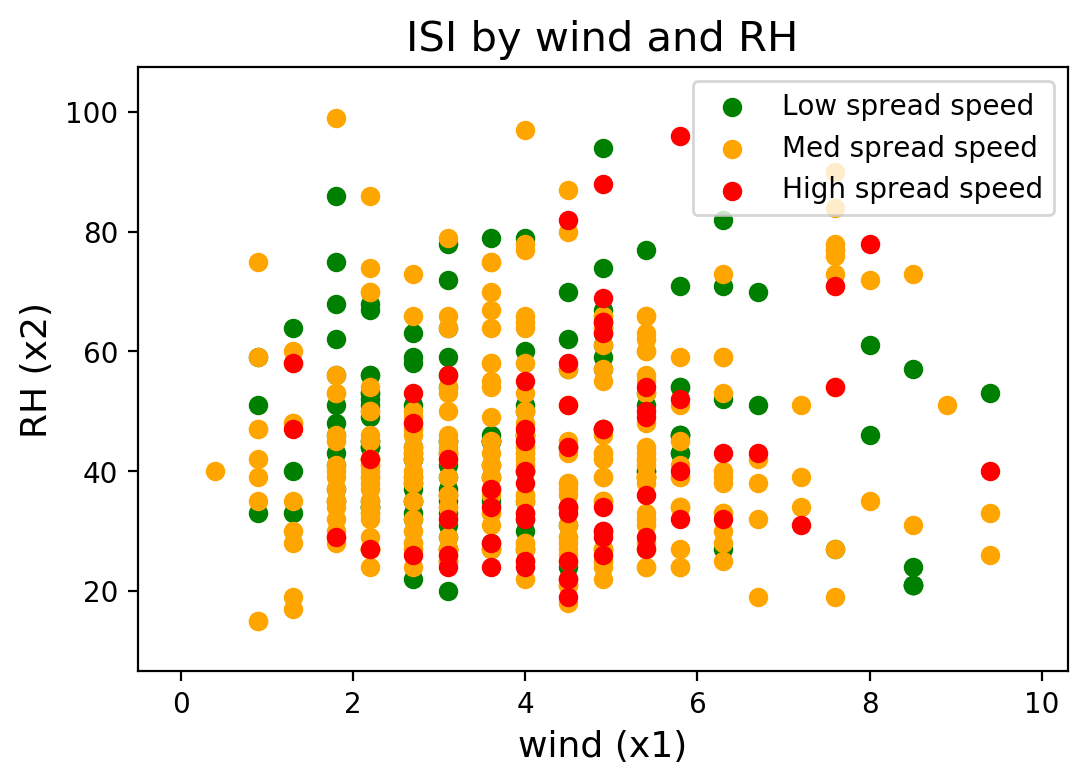

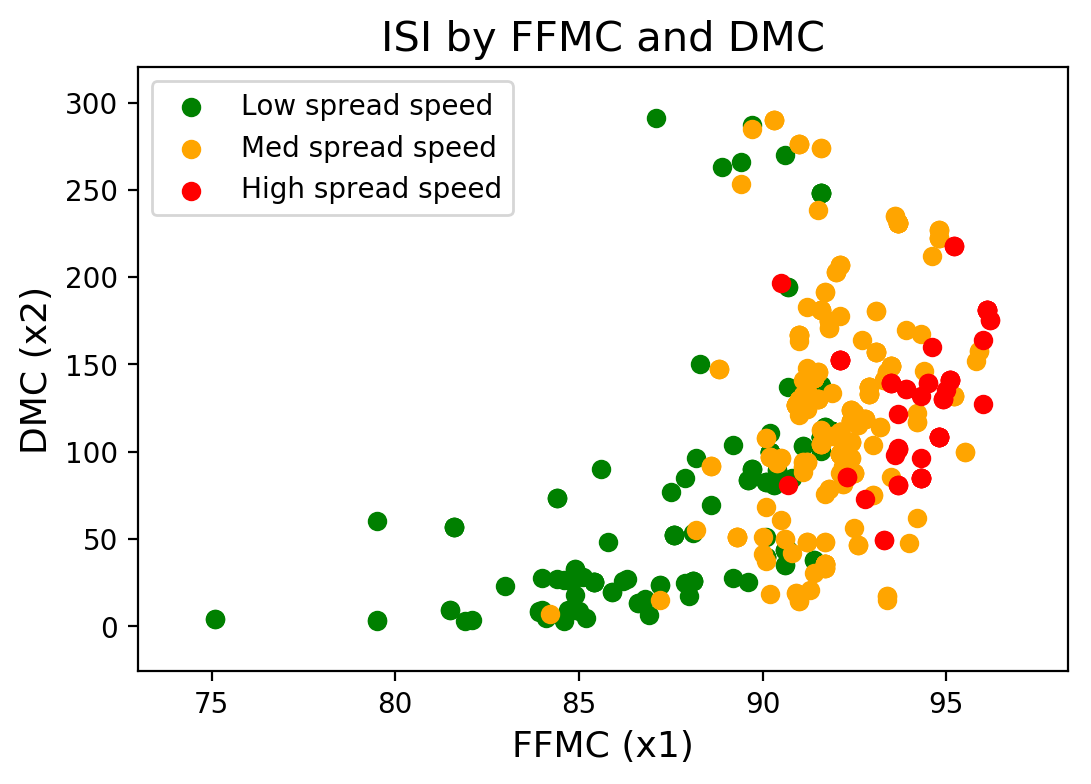

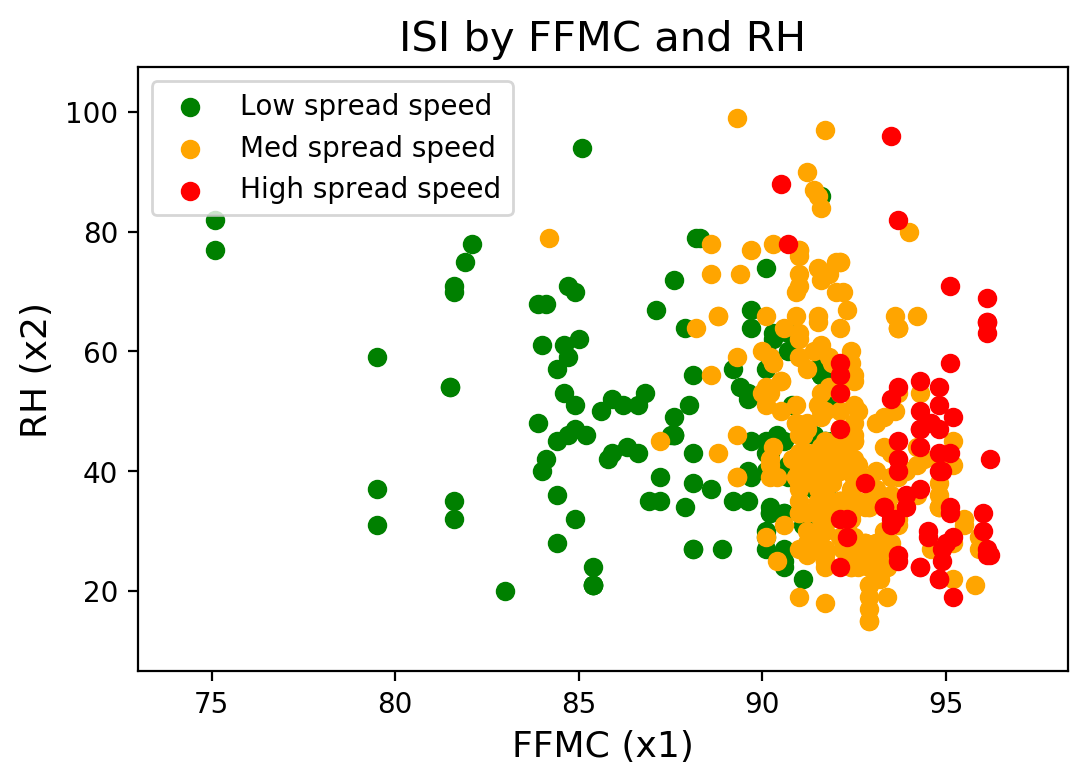

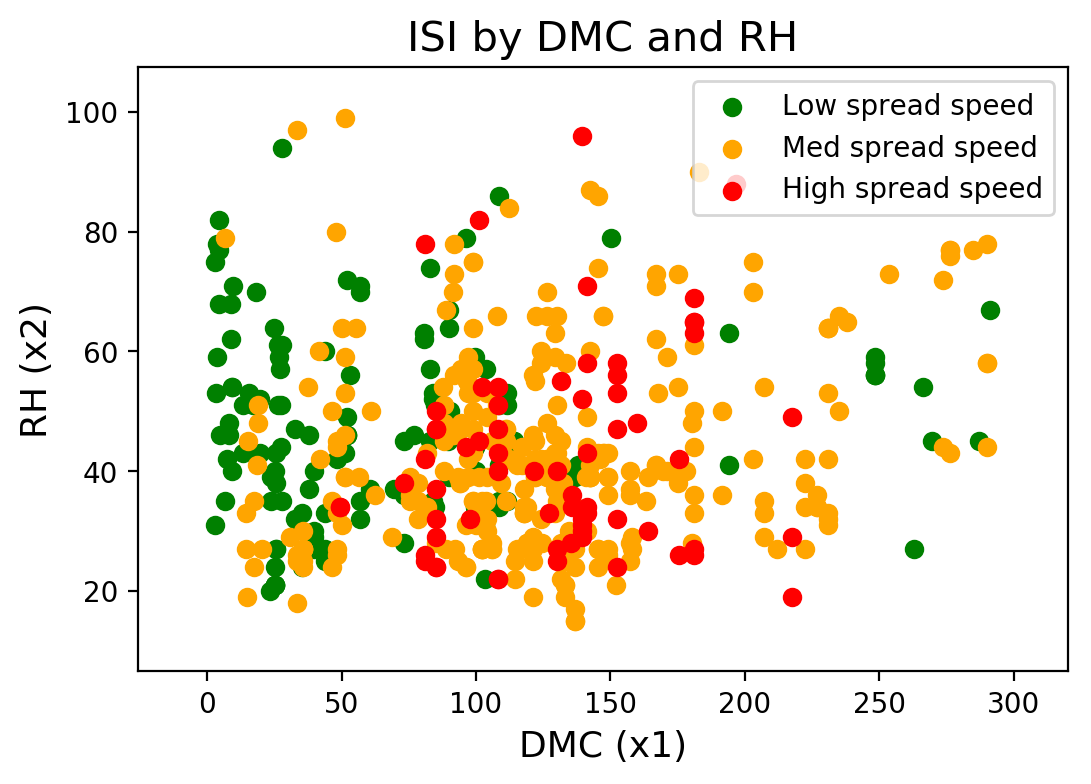

In [8]:

for i in range(0, 4):
    for j in range(i+1, 4):
#         print(i)
#         print(j)
        x1_min, x1_max = X[:, i].min()-0.1*(X[:, i].max()-X[:, i].min()), X[:, i].max()+0.1*(X[:, i].max()-X[:, i].min() )
        x2_min, x2_max = X[:, j].min()-0.1*(X[:, j].max()-X[:, j].min()), X[:, j].max()+0.1*(X[:, j].max()-X[:, j].min() )

        plt.figure(dpi=200)
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
#         plt.scatter(X[y_==3,i],X[y_==3,j], marker = '+', c='red', label='3')
#         plt.scatter(X[y_==4,i],X[y_==4,j], marker = '+', c='orange', label='4')
#         plt.scatter(X[y_==5,i],X[y_==5,j], marker = '+', c='green', label='5')
#         plt.scatter(X[Targ==0,i],X[Targ==0,j], marker = 'o' , c='black',  label='WTF')
        plt.scatter(X[Targ==1,i],X[Targ==1,j], marker = 'o' , c='green',  label='Low spread speed')
        plt.scatter(X[Targ==2,i],X[Targ==2,j], marker = 'o' , c='orange', label='Med spread speed')
        plt.scatter(X[Targ==3,i],X[Targ==3,j], marker = 'o' , c='red',    label='High spread speed')
        plt.xlabel(xname[i]+' (x1)', size=13)
        plt.ylabel(xname[j]+' (x2)', size=13)
        plt.title(yname+' by '+xname[i]+' and '+xname[j], size= 15)
        plt.legend()
        plt.show()



## Double Feature Classification

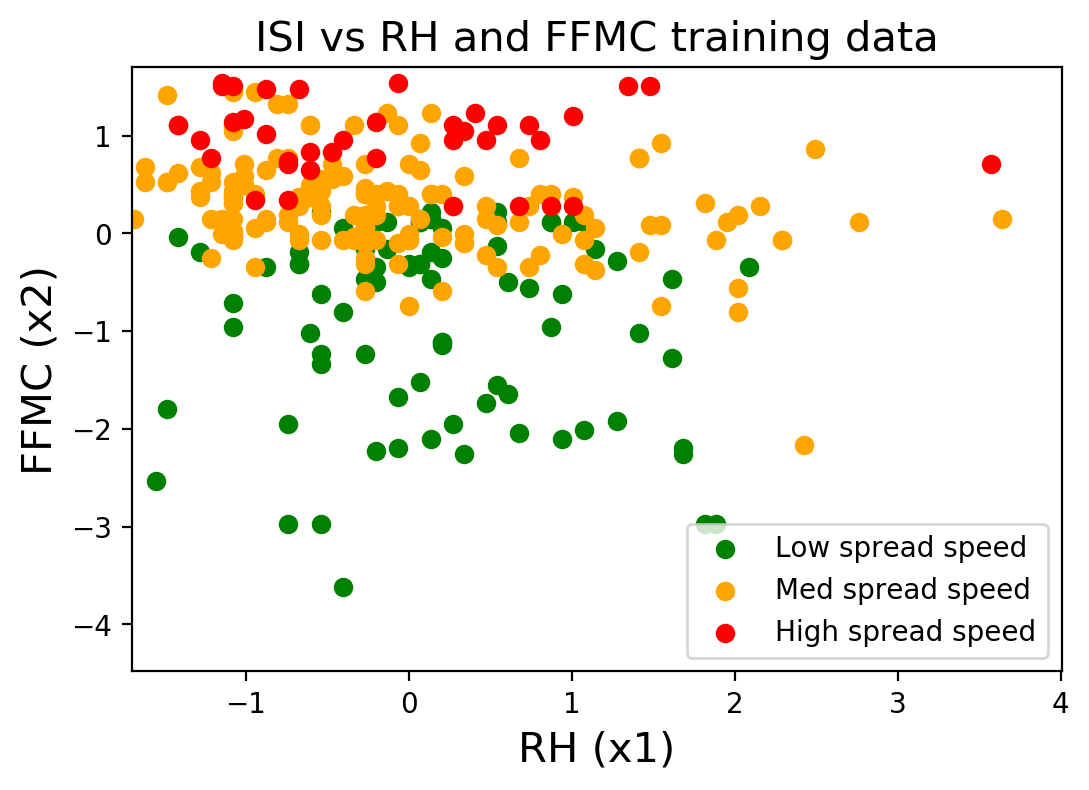

In [9]:
V = fire[['RH', 'FFMC']].values
y_ = Targ

from sklearn.model_selection import train_test_split
# data for model / final test split
X_t_, X_test_, y_t, y_test = train_test_split(V, y_, random_state = 0)
# training and validation split
X_train_, X_val_, y_train, y_val = train_test_split(X_t_, y_t, random_state = 0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_val = scaler.transform(X_val_)
#final test
X_test = scaler.transform(X_test_)

x1_min, x1_max = X_train[:, 0].min()*0.9, X_train[:, 0].max()*1.1
x2_min, x2_max = X_train[:, 1].min()*0.9, X_train[:, 1].max()*1.1
plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
# plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='black', label='Lower case')
# plt.scatter(X_train[y_train==4,0],X_train[y_train==4,1], marker = 'o', c='black', label='Higher case')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_train[y_train==3,0],X_train[y_train==3,1], marker = 'o' , c='red',    label='High spread speed')

plt.xlabel('RH (x1)', size=15)
plt.ylabel('FFMC (x2)', size=15)
plt.title('ISI vs RH and FFMC training data', size= 15)
plt.legend(loc='lower right')
plt.show()


### plot decision region and trainning data

Coefficients:
 [[-0.0997181  -2.77302685]
 [-0.0384331   0.75187493]
 [ 0.21483142  2.6722027 ]]
Intercepts:
 [-1.08182154  0.28577438 -2.9543947 ]


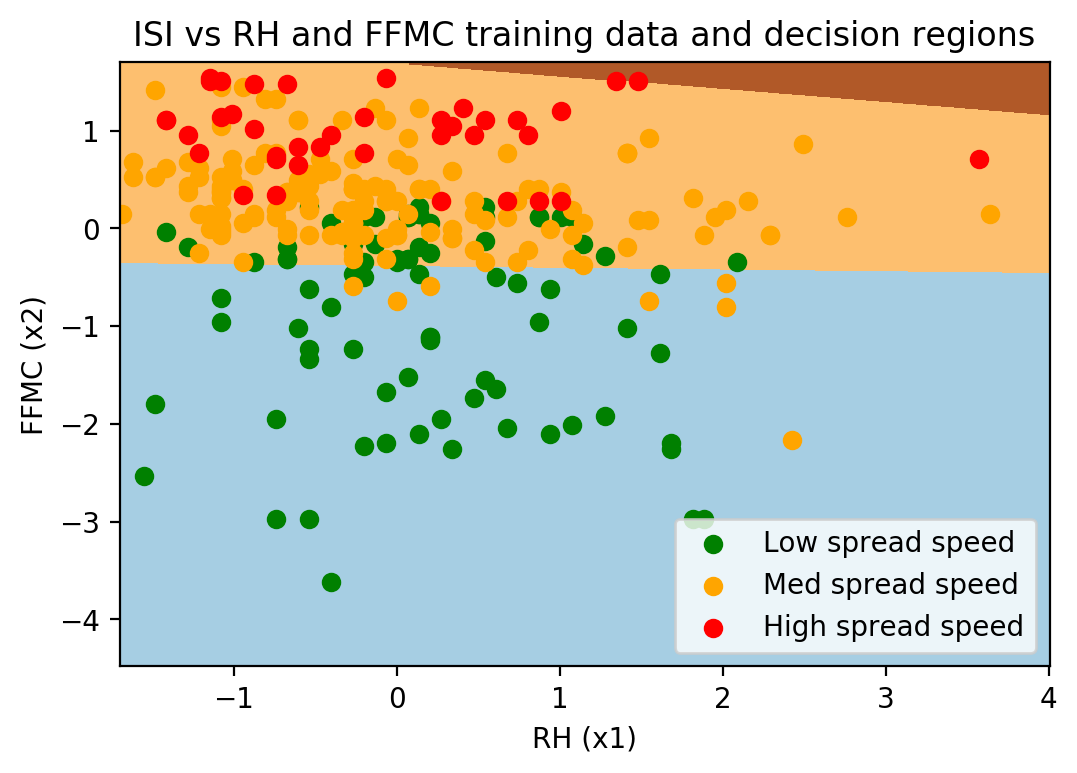

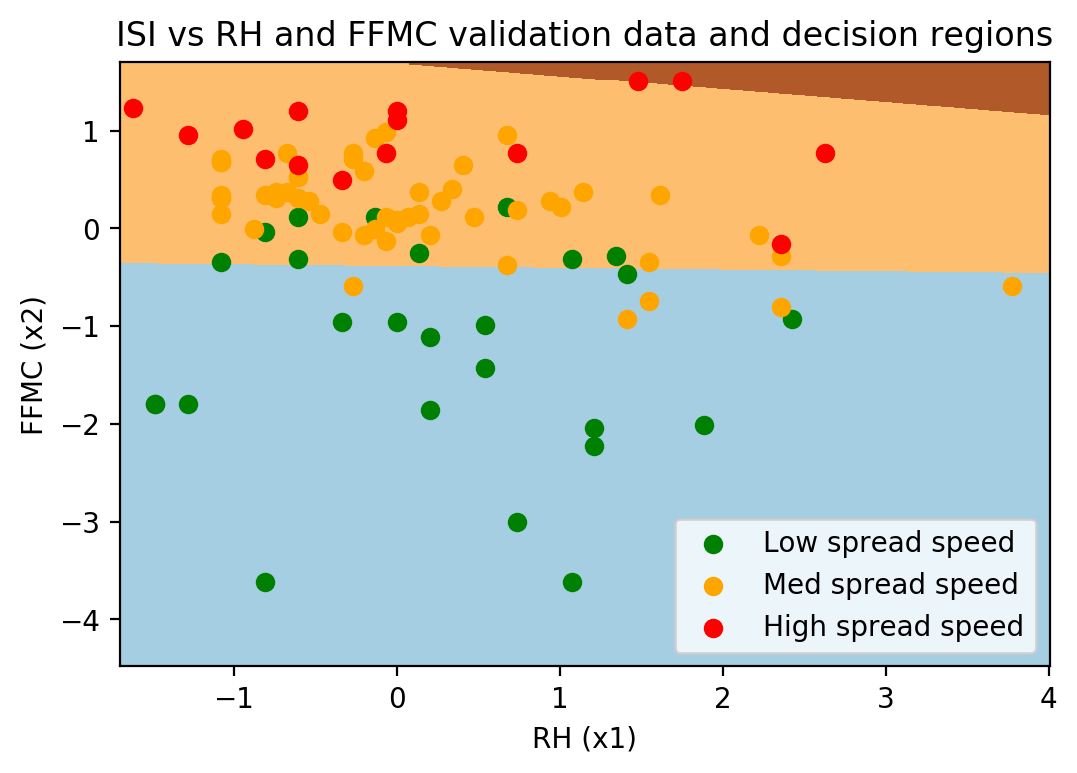

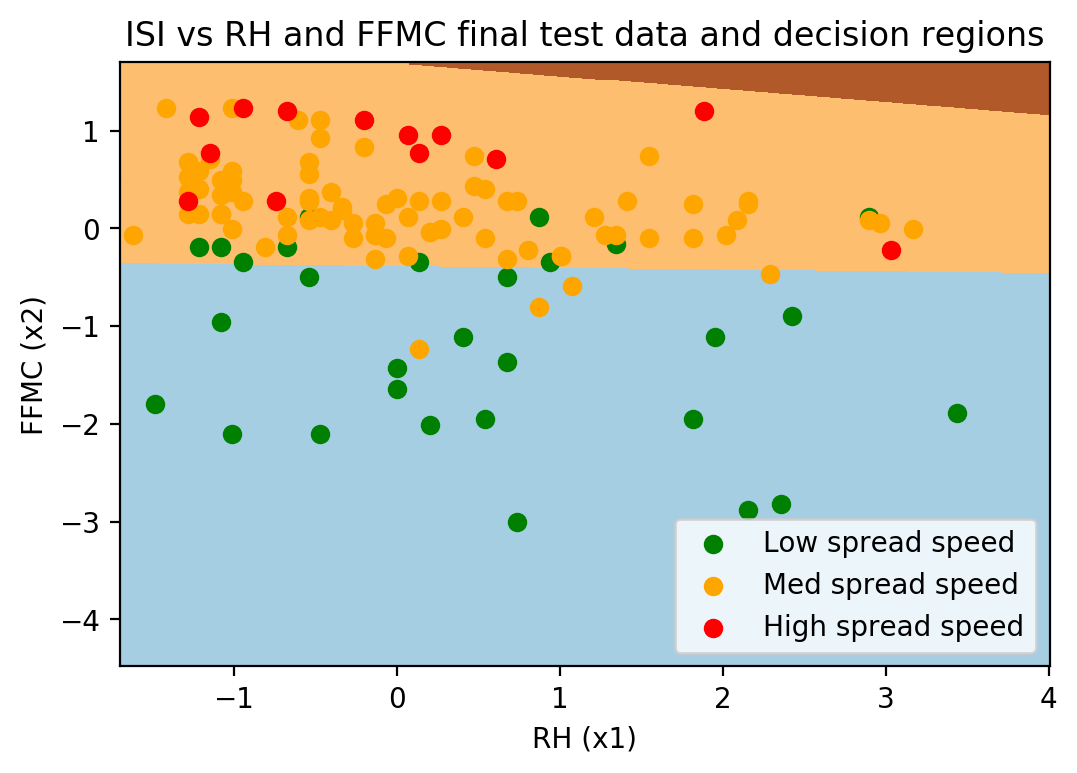

Accuracy of Logistic regression classifier on training set: 72.03%
Accuracy of Logistic regression classifier on validation set: 71.8750%
Accuracy of Logistic regression classifier on test set: 78.91%


In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

# decision regions
# Plot the decision region
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_train[y_train==3,0],X_train[y_train==3,1], marker = 'o' , c='red',    label='High spread speed')
plt.title('ISI vs RH and FFMC training data and decision regions')
plt.xlabel('RH (x1)')
plt.ylabel('FFMC (x2)')
plt.legend( scatterpoints=1, numpoints=1)
plt.legend(loc='lower right')
plt.show()

plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_val[y_val==1,0],X_val[y_val==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_val[y_val==2,0],X_val[y_val==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_val[y_val==3,0],X_val[y_val==3,1], marker = 'o' , c='red',    label='High spread speed')
plt.title('ISI vs RH and FFMC validation data and decision regions')
plt.xlabel('RH (x1)')
plt.ylabel('FFMC (x2)')
plt.legend( scatterpoints=1, numpoints=1)
plt.legend(loc='lower right')
plt.show()

plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_test[y_test==2,0],X_test[y_test==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_test[y_test==3,0],X_test[y_test==3,1], marker = 'o' , c='red',    label='High spread speed')
plt.title('ISI vs RH and FFMC final test data and decision regions')
plt.xlabel('RH (x1)')
plt.ylabel('FFMC (x2)')
plt.legend( scatterpoints=1, numpoints=1)
plt.legend(loc='lower right')
plt.show()



print('Accuracy of Logistic regression classifier on training set: {:.2f}%'
     .format(clf.score(X_train, y_train)*100))
print('Accuracy of Logistic regression classifier on validation set: {:.4f}%'
     .format(clf.score(X_val, y_val)*100))
print('Accuracy of Logistic regression classifier on test set: {:.2f}%'
     .format(clf.score(X_test, y_test)*100))

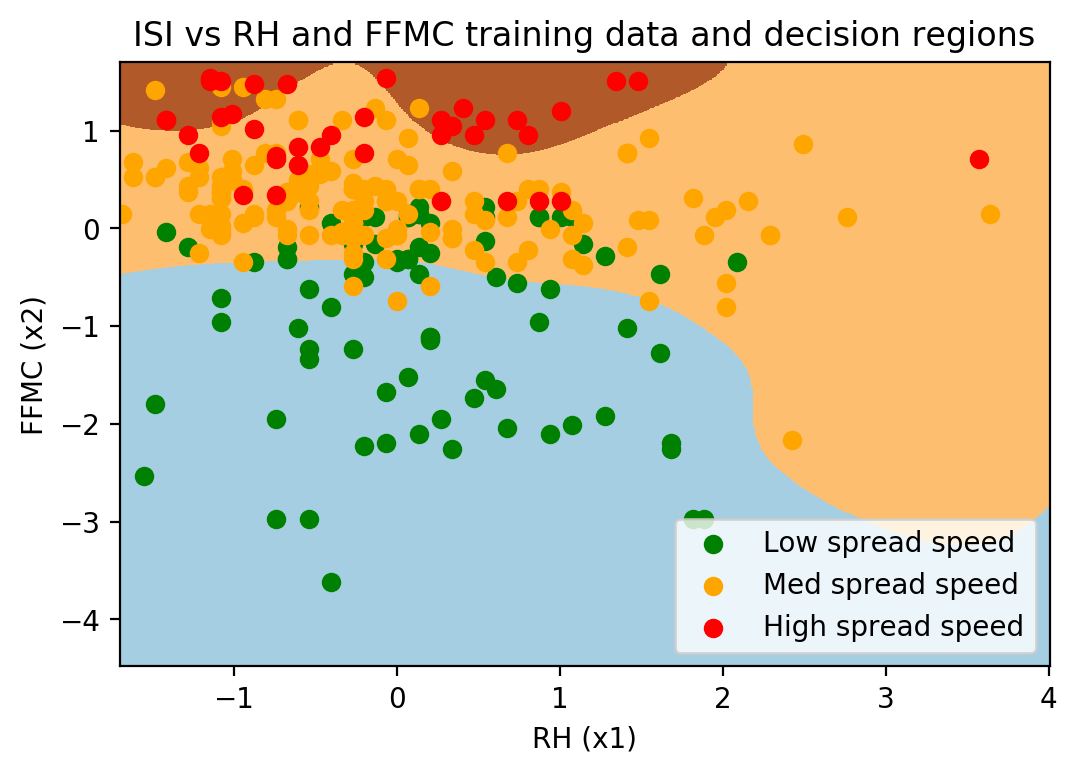

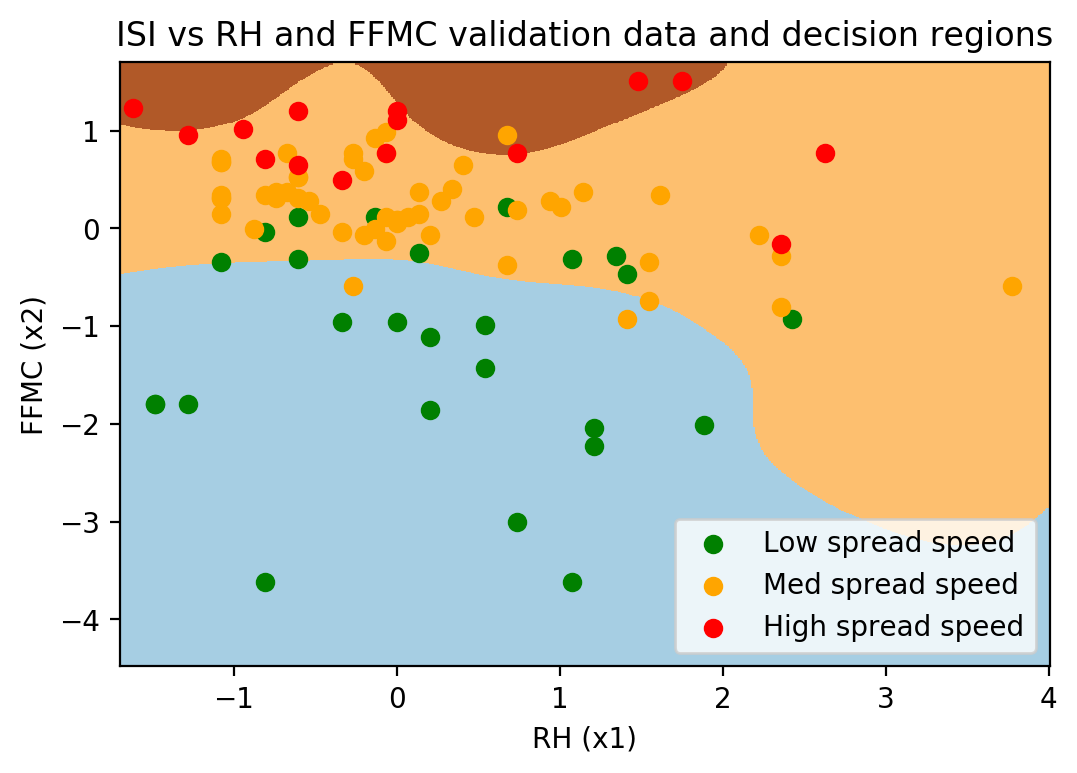

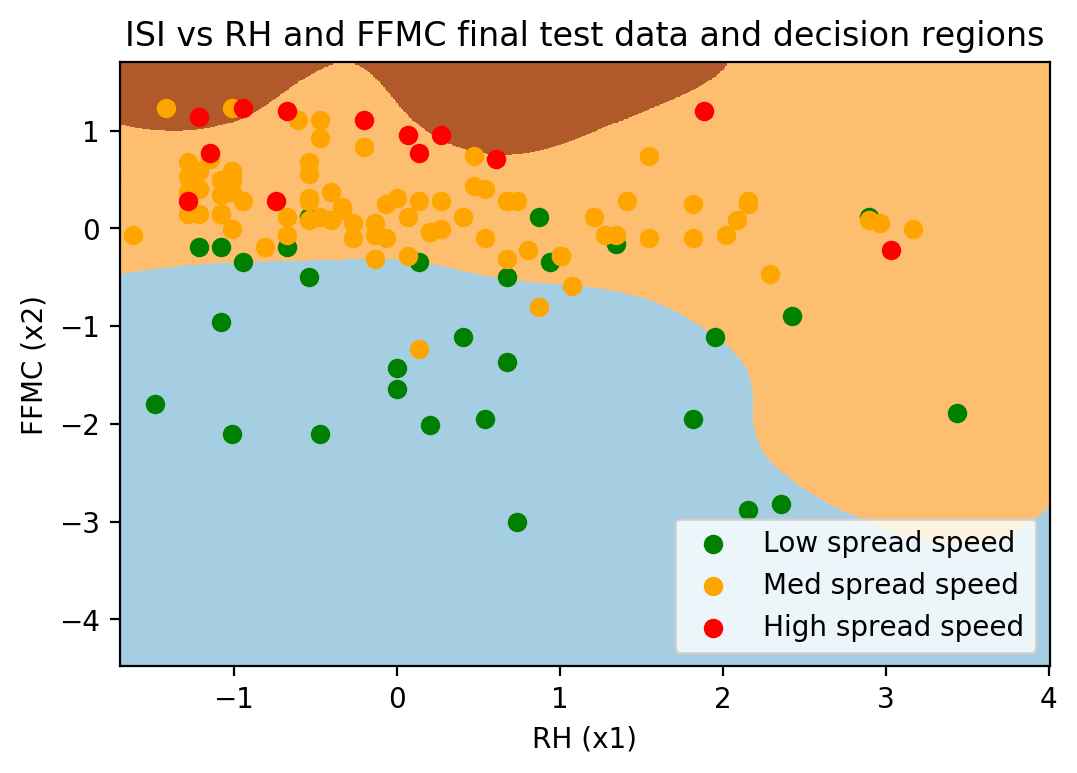

Gamma value: 1.5000
Accuracy of SVC with RBF classifier on training set: 77.2727%
Accuracy of SVC with RBF classifier on validation set: 72.9167%
Accuracy of SVC with RBF classifier on final test set: 78.1250%


In [12]:
from sklearn.svm import SVC
gamma_svc = 1.5
clf = SVC(kernel='rbf', random_state=0, gamma=gamma_svc, C=1.0)
clf.fit(X_train, y_train)

h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_train[y_train==3,0],X_train[y_train==3,1], marker = 'o' , c='red',    label='High spread speed')
plt.title('ISI vs RH and FFMC training data and decision regions')
plt.xlabel('RH (x1)')
plt.ylabel('FFMC (x2)')
plt.legend( scatterpoints=1, numpoints=1)
plt.legend(loc='lower right')
plt.show()

plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_val[y_val==1,0],X_val[y_val==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_val[y_val==2,0],X_val[y_val==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_val[y_val==3,0],X_val[y_val==3,1], marker = 'o' , c='red',    label='High spread speed')
plt.title('ISI vs RH and FFMC validation data and decision regions')
plt.xlabel('RH (x1)')
plt.ylabel('FFMC (x2)')
plt.legend( scatterpoints=1, numpoints=1)
plt.legend(loc='lower right')
plt.show()

plt.figure(dpi=200)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o' , c='green',  label='Low spread speed')
plt.scatter(X_test[y_test==2,0],X_test[y_test==2,1], marker = 'o' , c='orange', label='Med spread speed')
plt.scatter(X_test[y_test==3,0],X_test[y_test==3,1], marker = 'o' , c='red',    label='High spread speed')
plt.title('ISI vs RH and FFMC final test data and decision regions')
plt.xlabel('RH (x1)')
plt.ylabel('FFMC (x2)')
plt.legend( scatterpoints=1, numpoints=1)
plt.legend(loc='lower right')
plt.show()

print('Gamma value: {:.4f}'.format(gamma_svc))
      
print('Accuracy of SVC with RBF classifier on training set: {:.4f}%'
     .format(clf.score(X_train, y_train)*100))
print('Accuracy of SVC with RBF classifier on validation set: {:.4f}%'
     .format(clf.score(X_val, y_val)*100))
print('Accuracy of SVC with RBF classifier on final test set: {:.4f}%'
     .format(clf.score(X_test, y_test)*100))

## Multi-Feature Classification

In [13]:
Vm = fire[['wind','FFMC','DMC','RH']].values
ym_ = Targ

from sklearn.model_selection import train_test_split
# data for model / final test split
Xm_t_, Xm_test_, ym_t, ym_test = train_test_split(Vm, ym_, random_state = 0)
# training and validation split
Xm_train_, Xm_val_, ym_train, ym_val = train_test_split(Xm_t_, ym_t, random_state = 0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xm_train = scaler.fit_transform(Xm_train_)
Xm_val = scaler.transform(Xm_val_)
#final test
Xm_test = scaler.transform(Xm_test_)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(Xm_train, ym_train)

print('Linear logistic regression ')
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

print('Feature Selected: wind, FFMC, DMC, RH')

print('Accuracy of Logistic classifier on training set: {:.2f}%'
     .format(clf.score(Xm_train, ym_train)*100))
print('Accuracy of Logistic classifier on validation set: {:.2f}%'
     .format(clf.score(Xm_val, ym_val)*100))
print('Accuracy of Logistic classifier on final test set: {:.2f}%'
     .format(clf.score(Xm_test, ym_test)*100))


from sklearn.svm import SVC
gamma_m_svc = 0.7
clf = SVC(kernel='rbf', random_state=0, gamma=gamma_m_svc, C=3.0)
clf.fit(Xm_train, ym_train)

print('Feature Selected: wind, FFMC, DMC, RH')
print('Gamma value: {:.4f}'.format(gamma_m_svc))
      
print('Accuracy of SVC with RBF classifier on training set: {:.2f}%'
     .format(clf.score(Xm_train, ym_train)*100))
print('Accuracy of SVC with RBF classifier on validation set: {:.2f}%'
     .format(clf.score(Xm_val, ym_val)*100))
print('Accuracy of SVC with RBF classifier on final test set: {:.2f}%'
     .format(clf.score(Xm_test, ym_test)*100))




# make into a binary problem: Apple vs non-Apple (True vs False, or 1 vs 0)
# y_[100]

# from sklearn.model_selection import train_test_split
# Xm_train_, Xm_test_, ym_train, ym_test = train_test_split(V,TMP, random_state = 4)

Linear logistic regression 
Coefficients:
 [[-0.68655164 -3.04441344  0.07278156 -0.05695749]
 [ 0.14510383  0.70343958  0.10384056 -0.07953731]
 [ 0.35149184  2.91396853 -0.40670044  0.25152821]]
Intercepts:
 [-1.19450442  0.28871247 -3.01516221]
Feature Selected: wind, FFMC, DMC, RH
Accuracy of Logistic classifier on training set: 73.78%
Accuracy of Logistic classifier on validation set: 76.04%
Accuracy of Logistic classifier on final test set: 81.25%
Feature Selected: wind, FFMC, DMC, RH
Gamma value: 0.7000
Accuracy of SVC with RBF classifier on training set: 87.76%
Accuracy of SVC with RBF classifier on validation set: 81.25%
Accuracy of SVC with RBF classifier on final test set: 80.47%


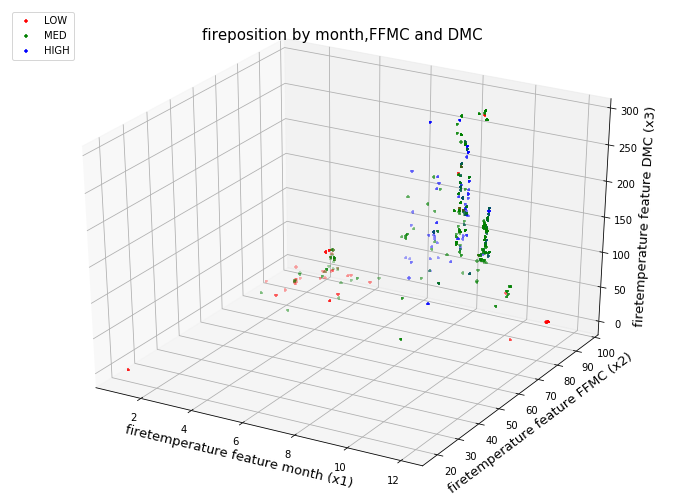

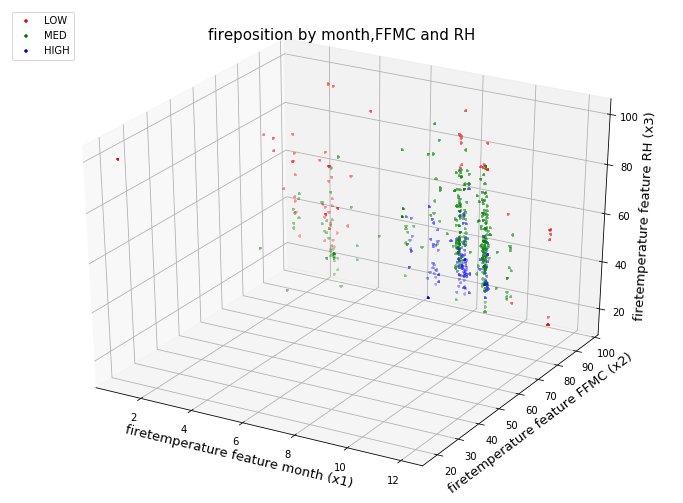

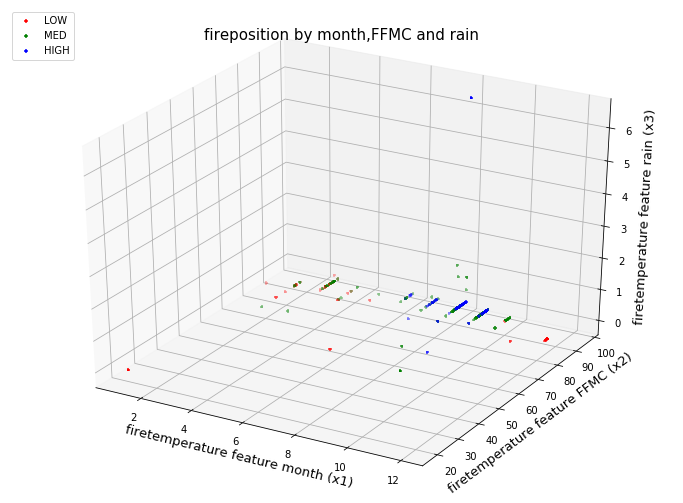

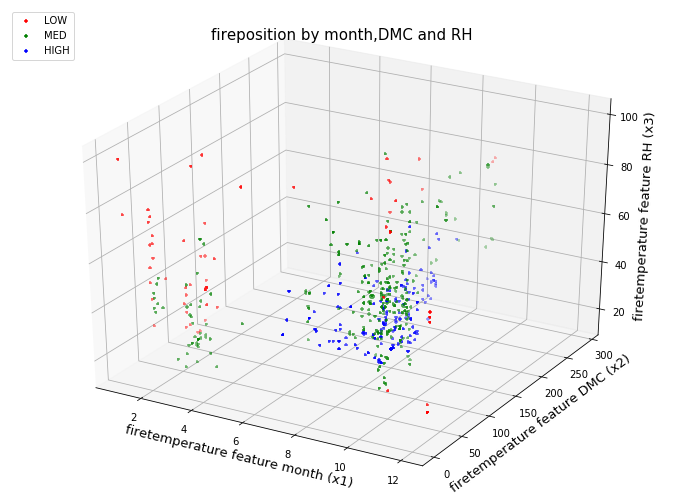

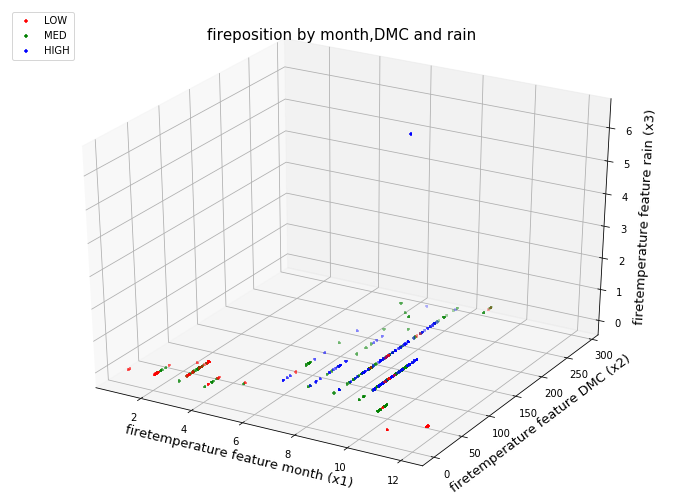

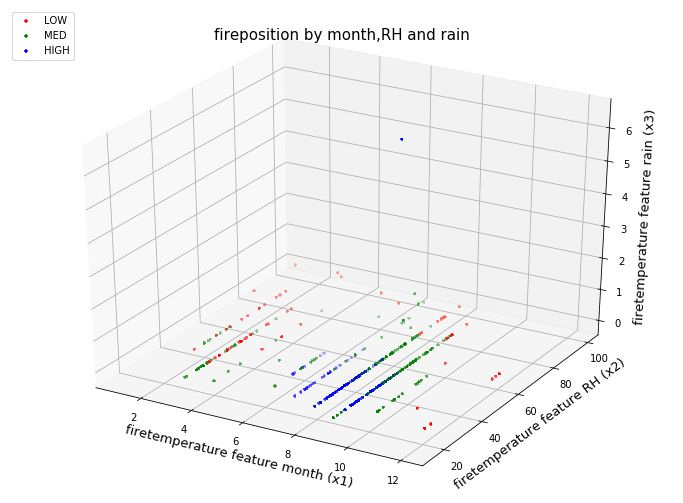

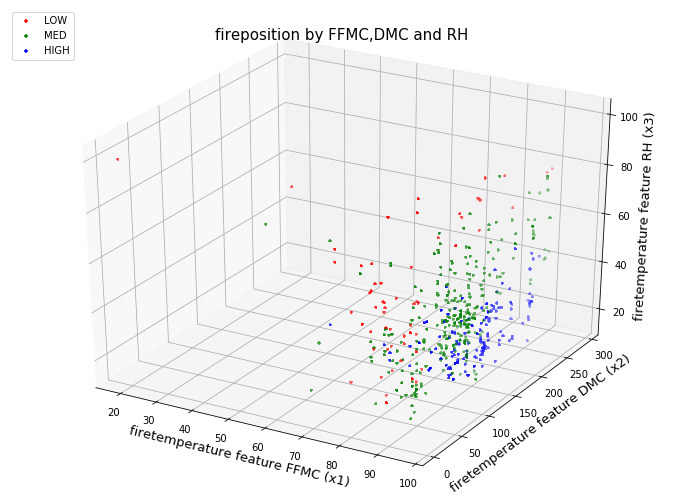

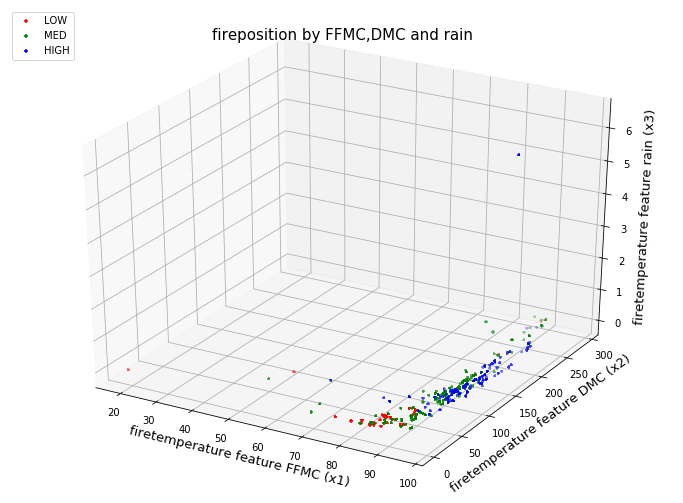

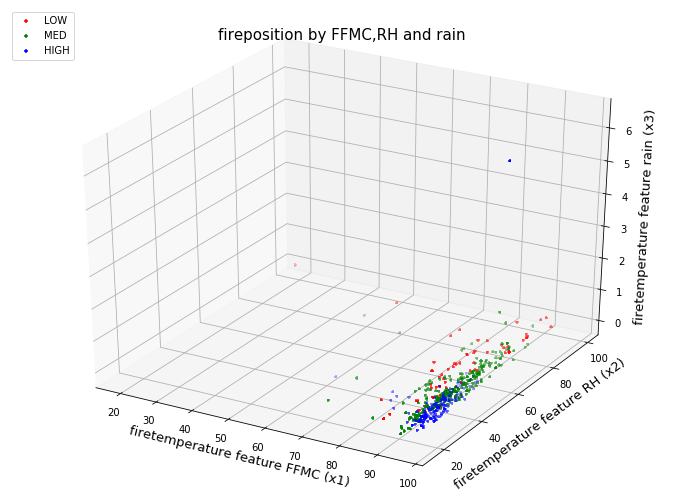

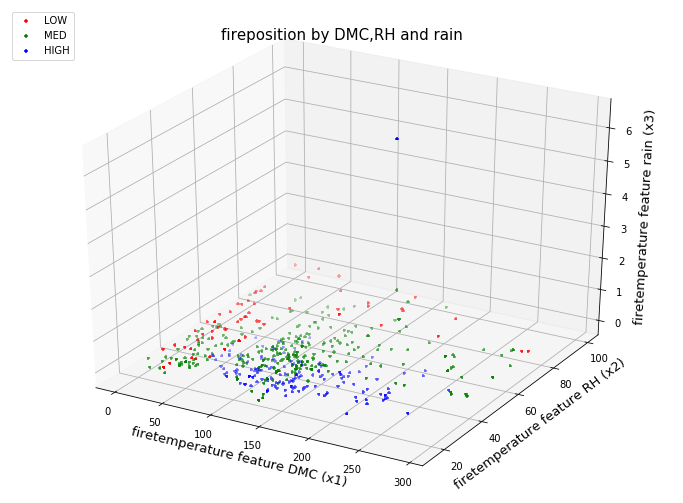

In [62]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
for i in range(0,5):
    for j in range(i+1,5):
        for k in range(j+1,5):
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            
            ax.scatter(X[TMP==1,i],X[TMP==1,j],X[TMP==1,k],marker = '+', c='red', s=10,label='LOW')
            ax.scatter(X[TMP==2,i],X[TMP==2,j],X[TMP==2,k],marker = '+', c='g', s=10,label='MED')
            ax.scatter(X[TMP==3,i],X[TMP==3,j],X[TMP==3,k],marker = '+', c='b', s=10,label='HIGH')
            ax.set_xlabel('firetemperature feature '+X_name[i]+' (x1)', size=13)
            ax.set_ylabel('firetemperature feature '+X_name[j]+' (x2)', size=13)
            ax.set_zlabel('firetemperature feature '+X_name[k]+' (x3)', size=13)
        
            ax.set_title('fireposition by '+X_name[i]+','+X_name[j]+' and '+X_name[k], size= 15)
            ax.legend(loc='upper left')
            plt.show()
